#📌 Extracão

In [1]:
# Célula 1: Importações
# =============================================================================
# ÁREA DE IMPORTAÇÃO
# Colocamos todas as bibliotecas que vamos usar aqui no topo.
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

print("Bibliotecas carregadas com sucesso!")


Bibliotecas carregadas com sucesso!


In [5]:
# Célula 2: Extração dos Dados
# =============================================================================
# FASE 1: EXTRAÇÃO (EXTRACT)
# O objetivo aqui é buscar os dados da fonte original (a API na internet).
# =============================================================================

# URL da API onde os dados estão armazenados
api_url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
print(f"Buscando dados em: {api_url}")

# Usamos o try/except para garantir que, se a internet falhar, o código não quebre.
try:
    # Usamos a biblioteca requests para carregar os dados brutos
    response = requests.get(api_url)
    data = response.json()
    
    # A função json_normalize é essencial para "achatar" os dados aninhados
    df = pd.json_normalize(data)
    
    print("\n✅ Dados extraídos e normalizados com sucesso!")
    print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

except Exception as e:
    print(f"❌ Falha ao buscar dados: {e}")
    df = pd.DataFrame() # Cria um DataFrame vazio para não dar erro depois


Buscando dados em: https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json

✅ Dados extraídos e normalizados com sucesso!
O dataset possui 7267 linhas e 21 colunas.


#🔧 Transformação

In [6]:
# Célula 3: Limpeza e Transformação
# =============================================================================
# FASE 2: TRANSFORMAÇÃO (TRANSFORM)
# =============================================================================

if not df.empty:
    # Passo 2.1: Padronizar os nomes das colunas (DICA 2)
    # Removemos prefixos e deixamos tudo em letra minúscula.
    df.columns = df.columns.str.replace('customer.|phone.|internet.|account.|Charges.', '', regex=True)
    df.columns = df.columns.str.lower()
    
    print("Colunas após a limpeza e padronização:")
    print(df.columns.to_list())

    # Passo 2.2: Limpar a coluna "churn"
    # Garantimos que só temos 'Yes' e 'No' e criamos uma coluna numérica (0 e 1)
    df = df[df['churn'].isin(['Yes', 'No'])].copy()
    df['churn_numeric'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Passo 2.3: Limpar e corrigir a coluna "total" (antiga Charges.Total)
    # Convertemos para número e preenchemos os valores vazios (de clientes novos) com 0.
    df['total'] = pd.to_numeric(df['total'], errors='coerce')
    df['total'].fillna(0, inplace=True)

    print("\n✅ Dados limpos e transformados!")
    print("\nVisualizando as 5 primeiras linhas do DataFrame tratado:")
    display(df.head())
else:
    print("⚠️ DataFrame está vazio. A análise não pode continuar.")

Colunas após a limpeza e padronização:
['d', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthly', 'total']

✅ Dados limpos e transformados!

Visualizando as 5 primeiras linhas do DataFrame tratado:


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8064\1434659264.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total'].fillna(0, inplace=True)


,d,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthly,total,churn_numeric
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1


#📊 Carga e análise

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8064\3593793201.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette=['#27ae60', '#c0392b'])


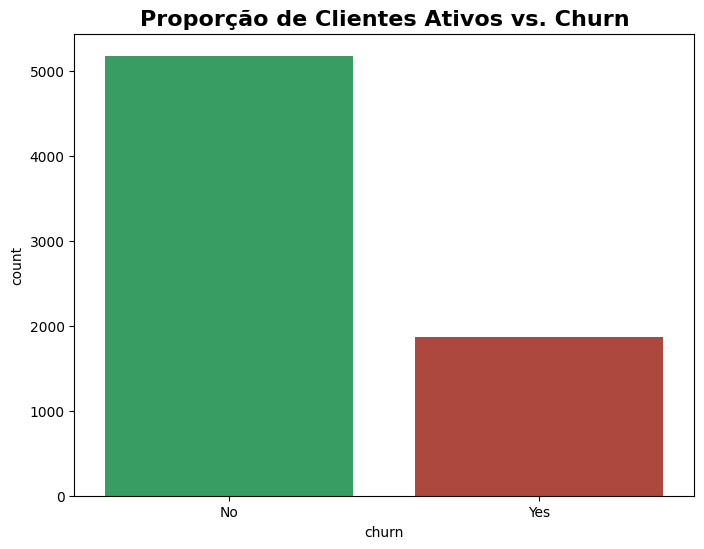

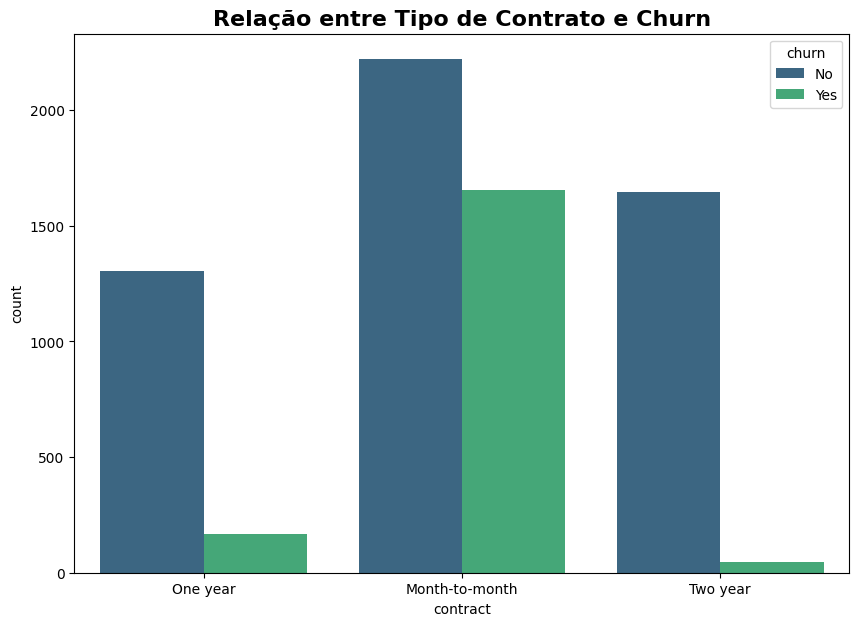

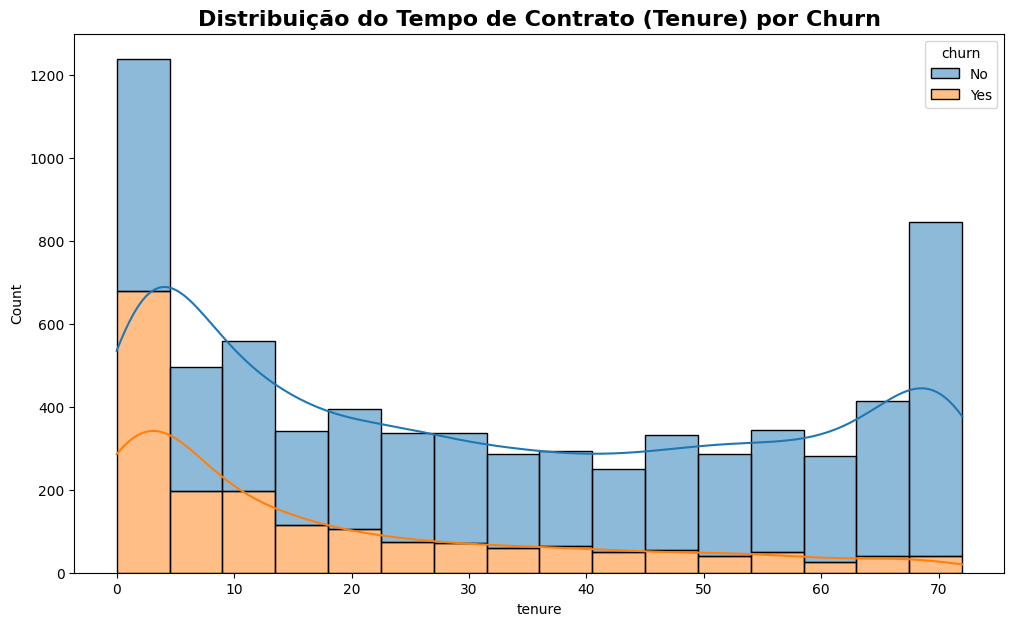

In [7]:
# Célula 4: Análise e Visualização
# =============================================================================
# FASE 3: ANÁLISE EXPLORATÓRIA (EDA)
# =============================================================================

if not df.empty:
    # Gráfico 1: Qual a proporção de clientes que saíram?
    plt.figure(figsize=(8, 6))
    sns.countplot(x='churn', data=df, palette=['#27ae60', '#c0392b'])
    plt.title('Proporção de Clientes Ativos vs. Churn', fontsize=16, fontweight='bold')
    plt.show()

    # Gráfico 2: O tipo de contrato influencia no churn?
    plt.figure(figsize=(10, 7))
    sns.countplot(x='contract', hue='churn', data=df, palette='viridis')
    plt.title('Relação entre Tipo de Contrato e Churn', fontsize=16, fontweight='bold')
    plt.show()

    # Gráfico 3: Clientes novos ou antigos saem mais?
    plt.figure(figsize=(12, 7))
    sns.histplot(data=df, x='tenure', hue='churn', kde=True, multiple="stack")
    plt.title('Distribuição do Tempo de Contrato (Tenure) por Churn', fontsize=16, fontweight='bold')
    plt.show()
else:
    print("⚠️ Análise não pode ser realizada pois não há dados.")

#📄Relatorio Final

In [8]:
# Célula 5: Relatório Final
# =============================================================================
# FASE 4: CONCLUSÃO E RELATÓRIO
# Aqui, usamos os dados para construir nossas conclusões.
# =============================================================================

if 'df' in locals() and not df.empty:
    # --- PASSO 1: CALCULAR AS MÉTRICAS PRINCIPAIS ---
    # Primeiro, calculamos todos os números que vamos precisar para o relatório.

    # Taxa de churn geral em porcentagem
    taxa_churn = df['churn_numeric'].mean()

    # Tempo médio de contrato (tenure) para quem saiu vs. quem ficou
    media_tenure_churn = df[df['churn'] == 'Yes']['tenure'].mean()
    media_tenure_ativo = df[df['churn'] == 'No']['tenure'].mean()
    
    # Gasto mensal médio para quem saiu vs. quem ficou
    media_mensal_churn = df[df['churn'] == 'Yes']['monthly'].mean()
    media_mensal_ativo = df[df['churn'] == 'No']['monthly'].mean()
    
    # Contrato com a maior taxa de churn
    contrato_maior_churn = df.groupby('contract')['churn_numeric'].mean().idxmax()
    taxa_contrato_maior_churn = df.groupby('contract')['churn_numeric'].mean().max()


    # --- PASSO 2: IMPRIMIR O RELATÓRIO FORMATADO ---
    # Usamos f-strings (esse f antes das aspas) para formatar o texto com nossos números.
    
    print("=" * 60)
    print("📄 RELATÓRIO FINAL: ANÁLISE DE EVASÃO DE CLIENTES")
    print("=" * 60)

    print("\n🎯 RESUMO EXECUTIVO")
    print("-" * 20)
    print(f"A análise revelou uma taxa de churn de {taxa_churn:.2%}, um valor que exige atenção.")
    
    print("\n🔍 PRINCIPAIS DESCOBERTAS (O 'PORQUÊ' DO CHURN)")
    print("-" * 45)
    print(f"1. TEMPO DE CASA É DECISIVO: Clientes que saem ficam em média {media_tenure_churn:.1f} meses, "
          f"enquanto clientes fiéis permanecem por {media_tenure_ativo:.1f} meses.")
    print(f"   ↳ AÇÃO: Focar a retenção nos primeiros 18 meses de contrato.\n")
    
    print(f"2. O CONTRATO MENSAL É O VILÃO: O tipo de contrato '{contrato_maior_churn}' é o principal "
          f"fator de risco, com uma taxa de churn de {taxa_contrato_maior_churn:.1%}.")
    print(f"   ↳ AÇÃO: Criar campanhas para migrar clientes para contratos anuais.\n")

    print(f"3. PREÇO vs. VALOR: Clientes que cancelam pagavam, em média, R$ {media_mensal_churn:.2f} por mês, "
          f"um valor maior que os R$ {media_mensal_ativo:.2f} pagos pelos clientes ativos.")
    print(f"   ↳ HIPÓTESE: Os clientes com planos mais caros não estão vendo valor suficiente para justificar o preço.\n")

    print("\n💡 CONCLUSÃO FINAL")
    print("-" * 20)
    print("O perfil de cliente com maior risco de evasão é claro: clientes com POUCO TEMPO DE CASA, ")
    print("no contrato MENSAL e que, muitas vezes, pagam mais caro sem perceber um benefício claro.")
    
    print("\n" + "=" * 60)
    print("Análise concluída.")
    
else:
    print("⚠️ Relatório não pode ser gerado pois não há dados processados.")

📄 RELATÓRIO FINAL: ANÁLISE DE EVASÃO DE CLIENTES

🎯 RESUMO EXECUTIVO
--------------------
A análise revelou uma taxa de churn de 26.54%, um valor que exige atenção.

🔍 PRINCIPAIS DESCOBERTAS (O 'PORQUÊ' DO CHURN)
---------------------------------------------
1. TEMPO DE CASA É DECISIVO: Clientes que saem ficam em média 18.0 meses, enquanto clientes fiéis permanecem por 37.6 meses.
   ↳ AÇÃO: Focar a retenção nos primeiros 18 meses de contrato.

2. O CONTRATO MENSAL É O VILÃO: O tipo de contrato 'Month-to-month' é o principal fator de risco, com uma taxa de churn de 42.7%.
   ↳ AÇÃO: Criar campanhas para migrar clientes para contratos anuais.

3. PREÇO vs. VALOR: Clientes que cancelam pagavam, em média, R$ 74.44 por mês, um valor maior que os R$ 61.27 pagos pelos clientes ativos.
   ↳ HIPÓTESE: Os clientes com planos mais caros não estão vendo valor suficiente para justificar o preço.


💡 CONCLUSÃO FINAL
--------------------
O perfil de cliente com maior risco de evasão é claro: cliente